### 1. Accident Severity Prediction using Random Forest Classifier
#### Author: Sparshika Ajmaan Dinesh Kumar 

In [1]:
import pandas as pd
import numpy as np
np.random.seed(123)

In [2]:
df = pd.read_csv('RTA Dataset.csv')

In [3]:
df.shape

(12316, 32)

In [4]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident severity')

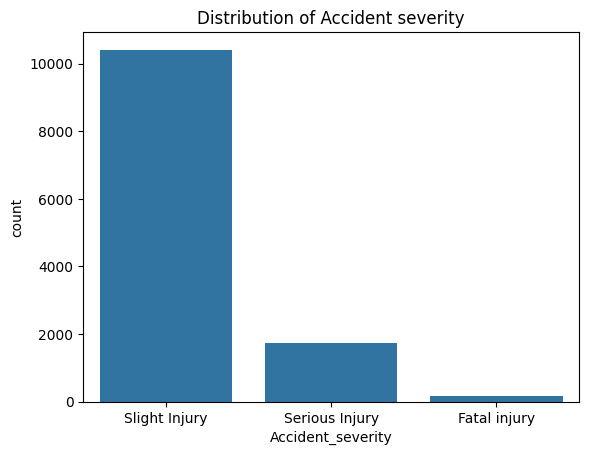

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

features = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Type_of_vehicle', 
            'Vehicle_movement', 'Service_year_of_vehicle']
target = 'Accident_severity'

X = df[features].copy() 
y = df[target].copy()

le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X.loc[:, column] = le.fit_transform(X[column].astype(str))

y = le.fit_transform(y.astype(str))

X = X.fillna(X.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights for imbalanced classes
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Apply SMOTE for oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Random Forest with class weights
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)

# Fit the model with balanced data from SMOTE
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({'feature': features, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

target_encoding = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nTarget Variable Encoding:")
print(target_encoding)

C:\Users\irfan\AppData\Local\Temp\ipykernel_153028\3434941014.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.fillna(X.mean())


Accuracy: 0.6907467532467533

Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.08      0.06        37
           1       0.19      0.29      0.23       363
           2       0.85      0.77      0.81      2064

    accuracy                           0.69      2464
   macro avg       0.37      0.38      0.37      2464
weighted avg       0.74      0.69      0.71      2464


Feature Importance:
                   feature  importance
0                     Time    0.464572
3          Type_of_vehicle    0.143060
5  Service_year_of_vehicle    0.118188
1              Day_of_week    0.096481
4         Vehicle_movement    0.091955
2       Age_band_of_driver    0.085745

Target Variable Encoding:
{'Fatal injury': np.int64(0), 'Serious Injury': np.int64(1), 'Slight Injury': np.int64(2)}


In [10]:
target_encoder = LabelEncoder()
target_encoder.fit(df['Accident_severity'])

test_data = pd.DataFrame({
    'Time': [20, 15, 10],
    'Day_of_week': ['Monday', 'Tuesday', 'Friday'],
    'Age_band_of_driver': ['18-30', '31-50', 'Over 51'],
    'Type_of_vehicle': ['Car', 'Truck', 'Motorcycle'],
    'Vehicle_movement': ['Going straight', 'U-turn', 'Moving backward'],
    'Service_year_of_vehicle': [5, 10, 2]
})

test_data_processed = test_data[features].copy()

for column in test_data_processed.select_dtypes(include=['object']).columns:
    test_data_processed.loc[:, column] = le.fit_transform(test_data_processed[column].astype(str))

test_data_processed = test_data_processed.fillna(X.mean()).infer_objects()

predictions = rf_model.predict(test_data_processed)

decoded_predictions = target_encoder.inverse_transform(predictions)

test_data['Predicted_Severity'] = decoded_predictions

test_data.head()

C:\Users\irfan\AppData\Local\Temp\ipykernel_153028\3292416066.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data_processed = test_data_processed.fillna(X.mean()).infer_objects()


,Time,Day_of_week,Age_band_of_driver,Type_of_vehicle,Vehicle_movement,Service_year_of_vehicle,Predicted_Severity
0,20,Monday,18-30,Car,Going straight,5,Slight Injury
1,15,Tuesday,31-50,Truck,U-turn,10,Serious Injury
2,10,Friday,Over 51,Motorcycle,Moving backward,2,Serious Injury


### 3. Impact of Road and Weather Conditions on Accident Severity using Logistic Regression
#### Author: Sudipth Ajitesh Saravanan 

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Step 1: Load the dataset
dataset_path = r"RTA Dataset.csv"
df = pd.read_csv(dataset_path)

# Step 2: Filter relevant columns for the analysis
selected_features = ['Road_surface_type', 'Lanes_or_Medians', 'Weather_conditions', 'Accident_severity']
df_filtered = df[selected_features].copy()

# Step 3: Handle missing values
df_filtered.dropna(inplace=True)

# Step 4: Encode categorical variables using LabelEncoder
le_log = LabelEncoder()

df_filtered['Road_surface_type'] = le_log.fit_transform(df_filtered['Road_surface_type'])
df_filtered['Lanes_or_Medians'] = le_log.fit_transform(df_filtered['Lanes_or_Medians'])
df_filtered['Weather_conditions'] = le_log.fit_transform(df_filtered['Weather_conditions'])
df_filtered['Accident_severity'] = le_log.fit_transform(df_filtered['Accident_severity'])

# Step 5: Prepare the target variable (binary classification)
df_filtered['Accident_severity'] = df_filtered['Accident_severity'].apply(lambda x: 1 if x >= 2 else 0)


In [59]:
# Step 6: Add polynomial features (Feature Engineering)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(df_filtered[['Road_surface_type', 'Lanes_or_Medians', 'Weather_conditions']])

# Step 7: Feature Selection using Recursive Feature Elimination (RFE)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())
log_model_rfe = LogisticRegression(max_iter=500, random_state=42, class_weight="balanced", solver='liblinear')
rfe = RFE(log_model_rfe, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_poly_df, df_filtered['Accident_severity'])

In [60]:
# Step 8: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_rfe, df_filtered['Accident_severity'])

# Step 9: Scale features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Step 10: Split the data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Step 11: Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0.01, 10),
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 500, 1000]
}
log_model = LogisticRegression(class_weight='balanced', random_state=42)
random_search = RandomizedSearchCV(log_model, param_distributions, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_log, y_train_log)

# Best model after hyperparameter tuning
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'C': np.float64(1.205942459383017), 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}


Accuracy: 0.51
ROC AUC Score: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.49      1989
           1       0.51      0.56      0.54      1989

    accuracy                           0.51      3978
   macro avg       0.51      0.51      0.51      3978
weighted avg       0.51      0.51      0.51      3978



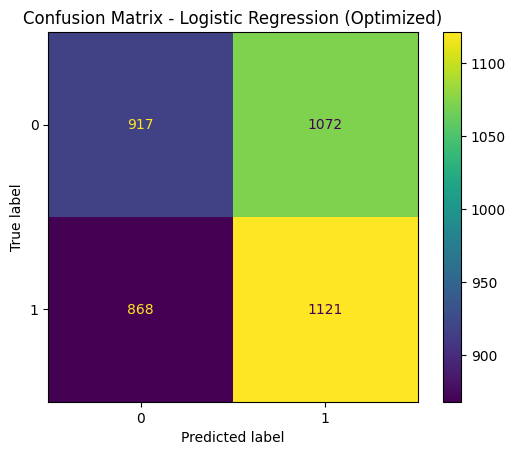

Selected Features and Coefficients:
                                Feature  Coefficient
0                     Road_surface_type     0.024318
1                      Lanes_or_Medians    -0.027348
2                    Weather_conditions     0.037246
3  Road_surface_type Weather_conditions    -0.051236
4   Lanes_or_Medians Weather_conditions     0.000000


In [61]:
# Step 12: Make predictions and evaluate the model
y_pred = best_model.predict(X_test_log)

# Model evaluation metrics
accuracy = accuracy_score(y_test_log, y_pred)
roc_auc = roc_auc_score(y_test_log, y_pred)
report = classification_report(y_test_log, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print("Classification Report:")
print(report)

# Step 13: Visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test_log, y_test_log)
plt.title("Confusion Matrix - Logistic Regression (Optimized)")
plt.show()

# Step 14: Interpret Coefficients
coefficients = pd.DataFrame({
    'Feature': np.array(X_poly_df.columns)[rfe.support_],
    'Coefficient': best_model.coef_[0]
})
print("Selected Features and Coefficients:")
print(coefficients)

### 4. Predicting Likelihood of Multi-Vehicle Accidents using MLP
#### Author: Mohammed Irfan Battegeri

### Data Preprocessing and Feature Selection

#### Handling Missing Data and Encoding

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
rta_dataset = pd.read_csv('RTA Dataset.csv')

# Create target variable for multi-vehicle involvement
rta_dataset["Multi_vehicle"] = (rta_dataset['Number_of_vehicles_involved'] > 1).astype(int)

# Fill missing values with mode (for categorical) or median (for numerical)
for col in rta_dataset.columns:
    if rta_dataset[col].dtype == 'object':
        rta_dataset[col] = rta_dataset[col].fillna(rta_dataset[col].mode()[0])
    else:
        rta_dataset[col] = rta_dataset[col].fillna(rta_dataset[col].median())

# Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder

encoded_features = []
label_encoders = {}
for col in rta_dataset.columns:
    if rta_dataset[col].dtype == 'object':
        le = LabelEncoder()
        rta_dataset[col] = le.fit_transform(rta_dataset[col])
        encoded_features.append(col)
        label_encoders[col] = le



#### Correlation analysis

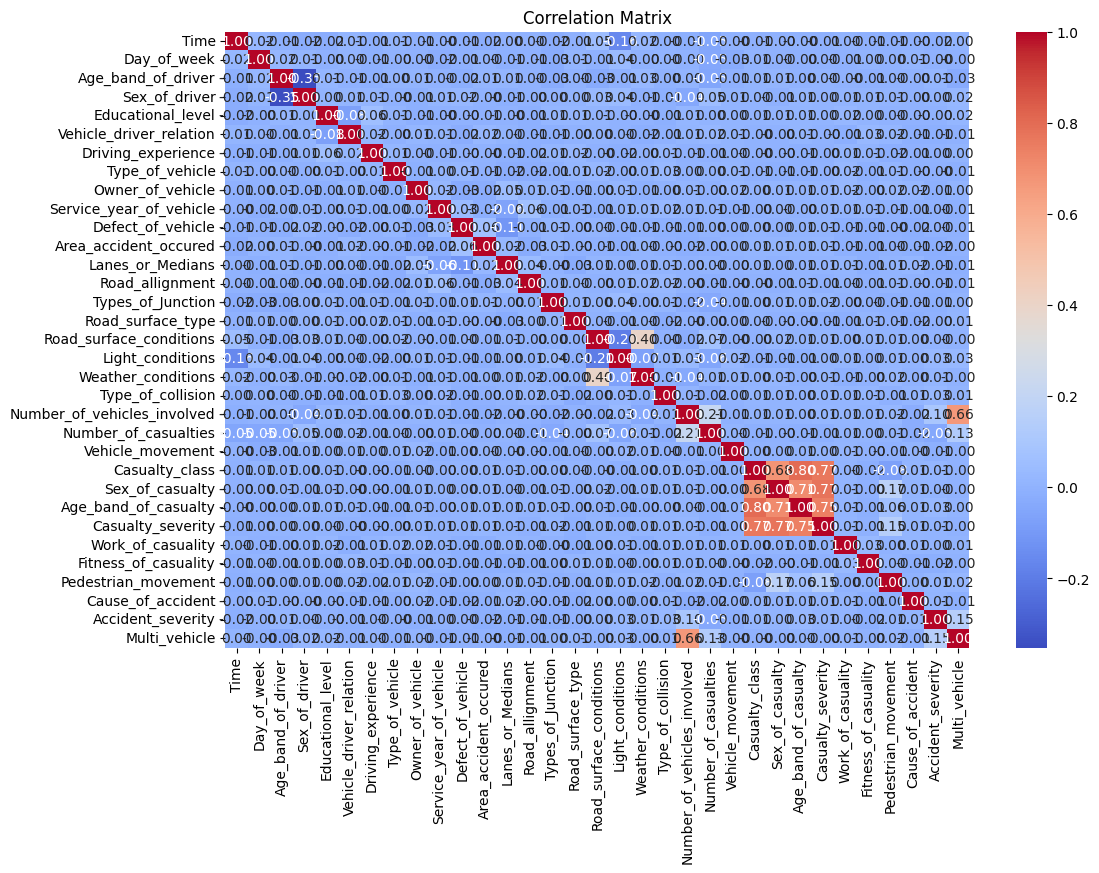

Correlation with Target (Multi_vehicle):
 Multi_vehicle                  1.000000
Number_of_vehicles_involved    0.664490
Accident_severity              0.147213
Number_of_casualties           0.127348
Light_conditions               0.025172
Sex_of_driver                  0.021084
Pedestrian_movement            0.020414
Educational_level              0.016484
Road_surface_type              0.008253
Type_of_collision              0.006480
Work_of_casuality              0.005498
Driving_experience             0.004401
Owner_of_vehicle               0.003810
Age_band_of_casualty           0.003789
Time                           0.003766
Types_of_Junction              0.003618
Casualty_severity             -0.000121
Road_surface_conditions       -0.000358
Vehicle_movement              -0.000463
Sex_of_casualty               -0.000758
Area_accident_occured         -0.000804
Casualty_class                -0.002630
Weather_conditions            -0.002662
Fitness_of_casuality          -0.00334

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = rta_dataset.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation with the target variable
correlation_with_target = correlation_matrix["Multi_vehicle"].sort_values(ascending=False)
print("Correlation with Target (Multi_vehicle):\n", correlation_with_target)


#### Statistical Tests for Categorical Features

In [17]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test for categorical features
chi_square_results = {}
for col in encoded_features:
    contingency_table = pd.crosstab(rta_dataset[col], rta_dataset["Multi_vehicle"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = p

# Print p-values
chi_square_results = pd.DataFrame.from_dict(chi_square_results, orient='index', columns=["p-value"])
chi_square_results = chi_square_results.sort_values(by="p-value")
print("Chi-Square Test Results:\n", chi_square_results)


Chi-Square Test Results:
                               p-value
Time                     6.920442e-99
Accident_severity        5.240132e-65
Types_of_Junction        3.505359e-17
Age_band_of_driver       1.642065e-06
Light_conditions         1.735933e-04
Sex_of_driver            1.332980e-02
Road_surface_type        1.540778e-02
Weather_conditions       1.610864e-02
Vehicle_movement         4.974136e-02
Road_surface_conditions  4.991111e-02
Day_of_week              1.103790e-01
Owner_of_vehicle         1.689374e-01
Fitness_of_casuality     1.762531e-01
Vehicle_driver_relation  2.439229e-01
Educational_level        2.627337e-01
Type_of_collision        2.835971e-01
Pedestrian_movement      3.841670e-01
Work_of_casuality        4.042566e-01
Type_of_vehicle          4.868320e-01
Road_allignment          5.151285e-01
Area_accident_occured    5.683869e-01
Driving_experience       5.768211e-01
Lanes_or_Medians         5.806521e-01
Defect_of_vehicle        6.497523e-01
Age_band_of_casualty    

#### Remove Low-Variance Features

In [18]:
X = rta_dataset.drop("Multi_vehicle", axis=1)
y = rta_dataset["Multi_vehicle"]

In [19]:
from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)  # Remove features with less than 1% variance
X_reduced = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()]

print("Selected Features After Variance Threshold:\n", selected_features)

Selected Features After Variance Threshold:
 Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


Based on the above findings, Most relevant features for predicting the likelihood of multi-vehicle accidents:


In [20]:
features = [
    "Weather_conditions", "Road_surface_type", "Time", "Sex_of_driver",
    "Age_band_of_driver", "Driving_experience", "Vehicle_movement",
    "Light_conditions", "Number_of_casualties", "Types_of_Junction", "Accident_severity"
]

In [21]:
rta_dataset[features].dtypes

Weather_conditions      int64
Road_surface_type       int64
Time                    int64
Sex_of_driver           int64
Age_band_of_driver      int64
Driving_experience      int64
Vehicle_movement        int64
Light_conditions        int64
Number_of_casualties    int64
Types_of_Junction       int64
Accident_severity       int64
dtype: object

In [22]:
# Splitting features and target
X_mlp = rta_dataset[features]
y_mlp = rta_dataset["Multi_vehicle"]

# Standardizing numerical features
scaler = StandardScaler()
X_mlp_scaled = scaler.fit_transform(X_mlp)

# Splitting the dataset into training and testing sets
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp_scaled, y_mlp, test_size=0.2, random_state=42)


### Model Training

In [23]:
from tensorflow.keras.layers import Input

# Building the MLP model
model_mlp = Sequential([
    Input(shape=(X_train_mlp.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compiling the model
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the MLP model
history_mlp = model_mlp.fit(X_train_mlp, y_train_mlp, epochs=20, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.4928 - val_accuracy: 0.8290 - val_loss: 0.4459
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8385 - loss: 0.4349 - val_accuracy: 0.8290 - val_loss: 0.4416
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8491 - loss: 0.4109 - val_accuracy: 0.8290 - val_loss: 0.4414
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8452 - loss: 0.4200 - val_accuracy: 0.8290 - val_loss: 0.4396
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.4282 - val_accuracy: 0.8290 - val_loss: 0.4410
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8348 - loss: 0.4277 - val_accuracy: 0.8290 - val_loss: 0.4412
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8405 - loss: 0.4154 - val_accuracy: 0.8290 - val_loss: 0.4420
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8443 - loss: 0.4077 - val_accuracy: 0.

### Model Evaluation

In [24]:
# Evaluating the model on the test set
y_pred_prob_mlp = model_mlp.predict(X_test_mlp)
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype(int)

# Performance metrics
accuracy_mlp = accuracy_score(y_test_mlp, y_pred_mlp)
report_mlp = classification_report(y_test_mlp, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test_mlp, y_pred_prob_mlp)

print("Accuracy:", accuracy_mlp)
print("Classification Report:\n", report_mlp)
print("ROC AUC Score:", roc_auc_mlp)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Accuracy: 0.8319805194805194
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.01      0.01       413
           1       0.83      1.00      0.91      2051

    accuracy                           0.83      2464
   macro avg       0.63      0.50      0.46      2464
weighted avg       0.77      0.83      0.76      2464

ROC AUC Score: 0.6536916380481735


Class 0 (non-multi-vehicle accidents) and Class 1 (multi-vehicle accidents)

#### Identified Issues
Class Imbalance:
The dataset has a significant imbalance between classes 0 and 1. This imbalance skews the model's predictions heavily towards the majority class (1).
Poor Performance on Class 0:

The model fails to predict non-multi-vehicle accidents accurately, as indicated by the low precision, recall, and F1-score for class 0.

### Model Improvement

Before trying below ADASYN technique, I have experimented with SMOTHE sampling, hyperparameter tuning, adding class weights but there was no satisfactory improvement in results

### ADASYN (Adaptive Synthetic Sampling) with Focal loss function

In [25]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to balance the dataset
adasyn = ADASYN(random_state=42)
X_train_balanced_mlp, y_train_balanced_mlp = adasyn.fit_resample(X_train_mlp, y_train_mlp)

# Verify class distribution
print("Class distribution after ADASYN:", np.bincount(y_train_balanced_mlp))


Class distribution after ADASYN: [7675 8269]


In [26]:
import tensorflow.keras.backend as K

def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.sum(
            (1-alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed


In [27]:


# Update the MLP model with extra layers
model_mlp_deep = Sequential([
    Input(shape=(X_train_balanced_mlp.shape[1],)),  # Specify input shape
    Dense(256, activation='relu'),
    Dropout(0.4),  # Regularization
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with focal loss
model_mlp_deep.compile(
    optimizer='adam',
    loss=focal_loss(alpha=0.25, gamma=2.0),  # Use focal loss
    metrics=['accuracy']
)

In [28]:
# Train the model
history_adasyn_deep = model_mlp_deep.fit(
    X_train_balanced_mlp, y_train_balanced_mlp,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4397 - loss: 2.2224 - val_accuracy: 0.9492 - val_loss: 2.7587
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4848 - loss: 2.1627 - val_accuracy: 0.9222 - val_loss: 2.7129
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5000 - loss: 2.1398 - val_accuracy: 0.9492 - val_loss: 2.6680
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5039 - loss: 2.1129 - val_accuracy: 0.9451 - val_loss: 2.6799
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5095 - loss: 2.1041 - val_accuracy: 0.9178 - val_loss: 2.7032
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5271 - loss: 2.0875 - val_accuracy: 0.9404 - val_loss: 2.6569
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5212 - loss: 2.0948 - val_accuracy: 0.9376 - val_loss: 2.7931
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5109 - loss: 2.0670 - val_accuracy: 0.

In [29]:
# Evaluate the model
y_pred_prob_adasyn_deep = model_mlp_deep.predict(X_test_mlp)
y_pred_adasyn_deep = (y_pred_prob_adasyn_deep > 0.5).astype(int)

# Calculate performance metrics
accuracy_adasyn_deep = accuracy_score(y_test_mlp, y_pred_adasyn_deep)
report_adasyn_deep = classification_report(y_test_mlp, y_pred_adasyn_deep)
roc_auc_adasyn_deep = roc_auc_score(y_test_mlp, y_pred_prob_adasyn_deep)

print("Accuracy:", accuracy_adasyn_deep)
print("Classification Report:\n", report_adasyn_deep)
print("ROC AUC Score:", roc_auc_adasyn_deep)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
Accuracy: 0.4537337662337662
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.81      0.33       413
           1       0.91      0.38      0.54      2051

    accuracy                           0.45      2464
   macro avg       0.56      0.59      0.43      2464
weighted avg       0.79      0.45      0.50      2464

ROC AUC Score: 0.6712877318452111


In [30]:
def evaluate_adasyn_params(sampling_strategy, n_neighbors):
    # Apply ADASYN with the given parameters
    adasyn = ADASYN(sampling_strategy=sampling_strategy, n_neighbors=n_neighbors, random_state=42)
    X_train_balanced_mlp, y_train_balanced_mlp = adasyn.fit_resample(X_train_mlp, y_train_mlp)
    
    # Train the model
    history = model_mlp_deep.fit(
        X_train_balanced_mlp, y_train_balanced_mlp,
        epochs=20,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
    
    # Evaluate the model
    y_pred_prob = model_mlp_deep.predict(X_test_mlp)
    y_pred = (y_pred_prob > 0.5).astype(int)
    report = classification_report(y_test_mlp, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test_mlp, y_pred_prob)
    
    return report, roc_auc


In [31]:
# Define the parameter grid
sampling_strategies = [0.5, 0.75, 'auto']
n_neighbors_values = [3, 5, 10]

# Iterate over parameter combinations
best_params = None
best_score = 0
results = []

for strategy in sampling_strategies:
    for neighbors in n_neighbors_values:
        print(f"Testing ADASYN with sampling_strategy={strategy}, n_neighbors={neighbors}")
        report, roc_auc = evaluate_adasyn_params(strategy, neighbors)
        results.append((strategy, neighbors, report['0']['f1-score'], roc_auc))
        
        # Track the best configuration
        if roc_auc > best_score:
            best_score = roc_auc
            best_params = (strategy, neighbors)

# Display the best parameters
print("Best ADASYN Parameters:", best_params)
print("Best ROC AUC Score:", best_score)


Testing ADASYN with sampling_strategy=0.5, n_neighbors=3
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step
Testing ADASYN with sampling_strategy=0.5, n_neighbors=5
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
Testing ADASYN with sampling_strategy=0.5, n_neighbors=10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
Testing ADASYN with sampling_strategy=0.75, n_neighbors=3
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
Testing ADASYN with sampling_strategy=0.75, n_neighbors=5
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
Testing ADASYN with sampling_strategy=0.75, n_neighbors=10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
Testing ADASYN with sampling_strategy=auto, n_neighbors=3
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
Testing ADASYN with sampling_strategy=auto, n_neighbors=5
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
Testing ADASYN with sampling_strategy=auto, n_neighbors=10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
Best ADASYN Parameters: (0.75, 5)
Best ROC AUC Score: 0.6897090299068664


In [32]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=["Sampling Strategy", "Neighbors", "F1-Score (Class 0)", "ROC AUC"])
results_df = results_df.sort_values(by="ROC AUC", ascending=False)

# Display results
print(results_df)


  Sampling Strategy  Neighbors  F1-Score (Class 0)   ROC AUC
4              0.75          5            0.361508  0.689709
2               0.5         10            0.311978  0.688432
1               0.5          5            0.340936  0.687663
6              auto          3            0.351983  0.685749
7              auto          5            0.355661  0.684862
8              auto         10            0.353075  0.683757
0               0.5          3            0.314286  0.680536
3              0.75          3            0.357230  0.679829
5              0.75         10            0.359133  0.678843


In [33]:
# Re-train using the best ADASYN configuration
adasyn = ADASYN(sampling_strategy= 0.75, n_neighbors=5, random_state=42)
X_train_balanced_mlp, y_train_balanced_mlp = adasyn.fit_resample(X_train_mlp, y_train_mlp)

# Train the MLP model
history_adasyn_best = model_mlp_deep.fit(
    X_train_balanced_mlp, y_train_balanced_mlp,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
y_pred_prob_adasyn_best = model_mlp_deep.predict(X_test_mlp)
y_pred_adasyn_best = (y_pred_prob_adasyn_best > 0.5).astype(int)

accuracy_adasyn_best = accuracy_score(y_test_mlp, y_pred_adasyn_best)
report_adasyn_best = classification_report(y_test_mlp, y_pred_adasyn_best)
roc_auc_adasyn_best = roc_auc_score(y_test_mlp, y_pred_prob_adasyn_best)

print("Accuracy:", accuracy_adasyn_best)
print("Classification Report:\n", report_adasyn_best)
print("ROC AUC Score:", roc_auc_adasyn_best)


Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6688 - loss: 1.5847 - val_accuracy: 0.9088 - val_loss: 2.2860
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6913 - loss: 1.5254 - val_accuracy: 0.9112 - val_loss: 2.3600
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6952 - loss: 1.5545 - val_accuracy: 0.9012 - val_loss: 2.3559
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6991 - loss: 1.5587 - val_accuracy: 0.9229 - val_loss: 2.3394
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6896 - loss: 1.5306 - val_accuracy: 0.9267 - val_loss: 2.1446
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6930 - loss: 1.5429 - val_accuracy: 0.8768 - val_loss: 2.5341
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6831 - loss: 1.5686 - val_accuracy: 0.8968 - val_loss: 2.3788
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6894 - loss: 1.5493 - val_accuracy: 0.

Precision-Recall AUC: 0.9144028945783602


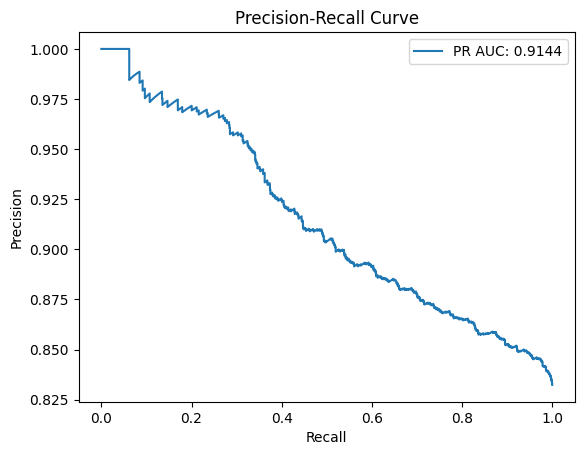

In [34]:
from sklearn.metrics import precision_recall_curve, auc

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_mlp, y_pred_prob_adasyn_best)

# Calculate PR AUC
pr_auc = auc(recall, precision)

# Display PR AUC
print("Precision-Recall AUC:", pr_auc)

# Plot the Precision-Recall Curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(recall, precision, label=f"PR AUC: {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


PR AUC has a very high score, indicating that the model performs well in balancing precision and recall, particularly for the minority class (0).

In [35]:
# Update MLP model with varying dropout rates
model_mlp_dropout = Sequential([
    Input(shape=(X_train_balanced_mlp.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Lower dropout
    Dense(128, activation='relu'),
    Dropout(0.4),  # Higher dropout
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_mlp_dropout.compile(
    optimizer='adam',
    loss=focal_loss(alpha=0.25, gamma=2.0),  # Use focal loss
    metrics=['accuracy']
)

# Train the model
history_dropout = model_mlp_dropout.fit(
    X_train_balanced_mlp, y_train_balanced_mlp,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4965 - loss: 2.1617 - val_accuracy: 0.8892 - val_loss: 3.4947
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4983 - loss: 2.0760 - val_accuracy: 0.8813 - val_loss: 3.6147
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5145 - loss: 2.0480 - val_accuracy: 0.8369 - val_loss: 3.6169
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5041 - loss: 2.0334 - val_accuracy: 0.8410 - val_loss: 3.5367
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5207 - loss: 2.0197 - val_accuracy: 0.7970 - val_loss: 3.7941
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5336 - loss: 1.9936 - val_accuracy: 0.8844 - val_loss: 3.4324
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5380 - loss: 1.9737 - val_accuracy: 0.9071 - val_loss: 3.3710
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5329 - loss: 1.9801 - val_accuracy: 0.

In [36]:
# Evaluate the model
y_pred_prob_dropout = model_mlp_dropout.predict(X_test_mlp)
y_pred_dropout = (y_pred_prob_dropout > 0.5).astype(int)

accuracy_dropout = accuracy_score(y_test_mlp, y_pred_dropout)
report_dropout = classification_report(y_test_mlp, y_pred_dropout)

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_mlp, y_pred_prob_dropout)

# Sort recall and precision to ensure monotonicity
sorted_indices = np.argsort(recall)
recall_sorted = recall[sorted_indices]
precision_sorted = precision[sorted_indices]

# Calculate PR AUC
pr_auc_dropout = auc(recall_sorted, precision_sorted)
print("Accuracy:", accuracy_dropout)
print("Classification Report:\n", report_dropout)
print("Precision-Recall AUC:", pr_auc_dropout)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
Accuracy: 0.4715909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.82      0.34       413
           1       0.92      0.40      0.56      2051

    accuracy                           0.47      2464
   macro avg       0.57      0.61      0.45      2464
weighted avg       0.80      0.47      0.52      2464

Precision-Recall AUC: 0.908092118742163


### Adding Early Stopping to prevent overfitting

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=5,               # Number of epochs with no improvement to wait
    restore_best_weights=True # Restore the weights of the best epoch
)


In [38]:
history_early_stopping = model_mlp_dropout.fit(
    X_train_balanced_mlp, y_train_balanced_mlp,
    epochs=100,                # Set a high maximum number of epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping], # Add early stopping
    verbose=1
)


Epoch 1/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5725 - loss: 1.8597 - val_accuracy: 0.8624 - val_loss: 3.2167
Epoch 2/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5901 - loss: 1.8338 - val_accuracy: 0.8562 - val_loss: 3.3152
Epoch 3/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5855 - loss: 1.8314 - val_accuracy: 0.8706 - val_loss: 3.1096
Epoch 4/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5760 - loss: 1.8450 - val_accuracy: 0.8534 - val_loss: 3.3045
Epoch 5/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6042 - loss: 1.7808 - val_accuracy: 0.8562 - val_loss: 3.1491
Epoch 6/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5938 - loss: 1.8064 - val_accuracy: 0.8641 - val_loss: 2.9998
Epoch 7/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5957 - loss: 1.7851 - val_accuracy: 0.8682 - val_loss: 3.1632
Epoch 8/100
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6126 - loss: 1.7792 - val_accu

In [39]:
# Predictions
y_pred_prob_early = model_mlp_dropout.predict(X_test_mlp)
y_pred_early = (y_pred_prob_early > 0.39).astype(int)

# Performance metrics
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, auc

# Calculate metrics
accuracy_early = accuracy_score(y_test_mlp, y_pred_early)
report_early = classification_report(y_test_mlp, y_pred_early)
precision, recall, thresholds = precision_recall_curve(y_test_mlp, y_pred_prob_early)
pr_auc_early = auc(recall, precision)

# Print metrics
print("Accuracy (Early Stopping):", accuracy_early)
print("Classification Report (Early Stopping):\n", report_early)
print("Precision-Recall AUC (Early Stopping):", pr_auc_early)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
Accuracy (Early Stopping): 0.8173701298701299
Classification Report (Early Stopping):
               precision    recall  f1-score   support

           0       0.37      0.13      0.19       413
           1       0.84      0.96      0.90      2051

    accuracy                           0.82      2464
   macro avg       0.61      0.54      0.54      2464
weighted avg       0.76      0.82      0.78      2464

Precision-Recall AUC (Early Stopping): 0.9126298209505386


#### 7. Adjust classification thresholds

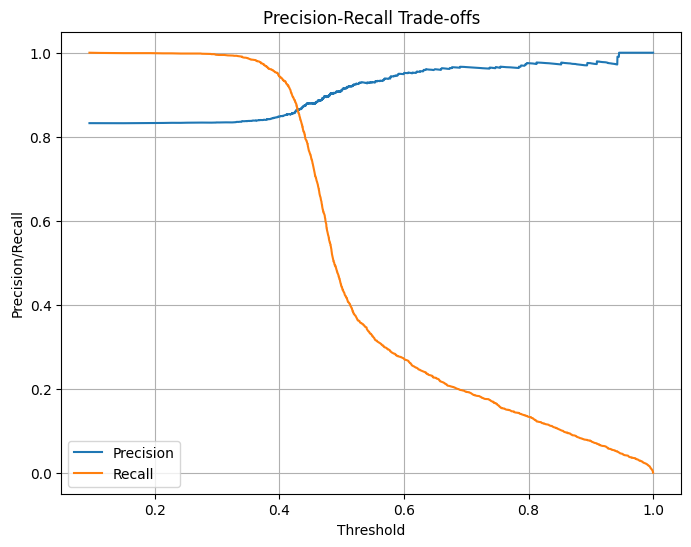

In [40]:
# Plot Precision-Recall trade-offs
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Trade-offs")
plt.legend()
plt.grid()
plt.show()

In [41]:
# Define new thresholds to evaluate
thresholds_to_test = [0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49]

for threshold in thresholds_to_test:
    print(f"Evaluating Threshold: {threshold}")
    
    # Apply threshold
    y_pred_new = (y_pred_prob_early > threshold).astype(int)
    
    # Evaluate performance
    accuracy_new = accuracy_score(y_test_mlp, y_pred_new)
    report_new = classification_report(y_test_mlp, y_pred_new)
    precision, recall, _ = precision_recall_curve(y_test_mlp, y_pred_prob_early)
    pr_auc_new = auc(recall, precision)
    
    print(f"Accuracy: {accuracy_new}")
    print(f"Classification Report:\n{report_new}")
    print(f"PR AUC: {pr_auc_new}")
    print("-" * 50)


Evaluating Threshold: 0.4
Accuracy: 0.8129058441558441
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.16      0.23       413
           1       0.85      0.94      0.89      2051

    accuracy                           0.81      2464
   macro avg       0.61      0.55      0.56      2464
weighted avg       0.77      0.81      0.78      2464

PR AUC: 0.9126298209505386
--------------------------------------------------
Evaluating Threshold: 0.41
Accuracy: 0.8080357142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.20      0.26       413
           1       0.85      0.93      0.89      2051

    accuracy                           0.81      2464
   macro avg       0.61      0.56      0.57      2464
weighted avg       0.77      0.81      0.78      2464

PR AUC: 0.9126298209505386
--------------------------------------------------
Evaluating Threshold: 0.42
Accura

Threshold 0.44 is the better choice based on the RTA dataset because:
It improves recall for multi-vehicle accidents (0), which is critical in this context.
It provides a balanced accuracy of above 70%.
While precision drops slightly, it’s acceptable given the importance of identifying as many potential multi-vehicle accidents as possible.
The improved F1-score and balanced performance make it more suitable for real-world accident prediction systems.

In [42]:
# Apply final threshold
y_pred_final = (y_pred_prob_early > 0.44).astype(int)

# Evaluate performance
accuracy_final = accuracy_score(y_test_mlp, y_pred_final)
report_final = classification_report(y_test_mlp, y_pred_final)
precision, recall, _ = precision_recall_curve(y_test_mlp, y_pred_prob_early)

print(f"Accuracy: {accuracy_final}")
print(f"Classification Report:\n{report_final}")
print(f"PR AUC: {pr_auc_new}")


Accuracy: 0.7435064935064936
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.42      0.36       413
           1       0.87      0.81      0.84      2051

    accuracy                           0.74      2464
   macro avg       0.59      0.62      0.60      2464
weighted avg       0.78      0.74      0.76      2464

PR AUC: 0.9126298209505386


#### Below I have performed ensemble modelling to boost the MLP model performance and it is specific to Question 4.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scikeras.wrappers import KerasClassifier

# Wrap MLP model for Sklearn
def build_mlp_model():
    model = Sequential([
        Input(shape=(X_train_balanced_mlp.shape[1],)),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap MLP model with Early Stopping
mlp_wrapper = KerasClassifier(model=build_mlp_model, epochs=50, batch_size=32, verbose=0)

# Add early stopping during fit
mlp_wrapper.fit(
    X_train_balanced_mlp,
    y_train_balanced_mlp,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Base models
logistic = LogisticRegression(random_state=42, max_iter=1000)
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
svc = SVC(probability=True, random_state=42)


In [45]:
from sklearn.ensemble import VotingClassifier

# Define ensemble with Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('mlp', mlp_wrapper),
        ('logistic', logistic),
        ('random_forest', random_forest),
        ('svc', svc)
    ],
    voting='soft'
)

# Fit Voting Classifier (MLP uses early stopping internally)
voting_clf.fit(X_train_balanced_mlp, y_train_balanced_mlp)

# Evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test_mlp)
print("Accuracy (Voting Classifier):", accuracy_score(y_test_mlp, y_pred_voting))
print("Classification Report (Voting Classifier):\n", classification_report(y_test_mlp, y_pred_voting))

Accuracy (Voting Classifier): 0.7800324675324676
Classification Report (Voting Classifier):
               precision    recall  f1-score   support

           0       0.34      0.33      0.33       413
           1       0.87      0.87      0.87      2051

    accuracy                           0.78      2464
   macro avg       0.60      0.60      0.60      2464
weighted avg       0.78      0.78      0.78      2464



In [46]:
results_en = {
    "Model": ["Base MLP", "Voting Classifier"],
    "Accuracy": [
        accuracy_score(y_test_mlp, y_pred_final),  # Base MLP (ADASYN + Early Stopping)
        accuracy_score(y_test_mlp, y_pred_voting)
    ],
    "F1-Score (Class 0)": [
        classification_report(y_test_mlp, y_pred_final, output_dict=True)['0']['f1-score'],
        classification_report(y_test_mlp, y_pred_voting, output_dict=True)['0']['f1-score']
    ]
}


en_df = pd.DataFrame(results_en)
print(en_df)

               Model  Accuracy  F1-Score (Class 0)
0           Base MLP  0.743506            0.356415
1  Voting Classifier  0.780032            0.334152


Based on above results, we can see the voting has boosted the accuracy of MLP but slightly lowered the recall for the minority class.

## 5. Ensemble Modelling (Using Random Forest, Logistic Regression for "Accident_severity")
#### Author: Praveen Kumar Jayakumar

From above questions, We can do ensemble modelling for Model 1 (Random Forest) and Model 3(Logistic Regression) to improve the classification of 'Accident Severity' attribute.

In [50]:
log_features = ['Road_surface_type', 'Lanes_or_Medians', 'Weather_conditions']
rf_features = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Type_of_vehicle', 'Vehicle_movement', 'Service_year_of_vehicle']
combined_features = list(set(rf_features + log_features))

X_en = rta_dataset[combined_features]
y_en = rta_dataset["Accident_severity"]
# Standardizing numerical features
scaler = StandardScaler()
X_en_scaled = scaler.fit_transform(X_en)
# Splitting the dataset into training and testing sets
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_en_scaled, y_en, test_size=0.2, random_state=42)

#### Voting

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),  # Random Forest (Model 1)
        ('log', best_model)  # Logistic Regression (Model 3)
    ],
    voting='soft'
)

voting_clf_hard = VotingClassifier(
    estimators=[
        ('rf', rf_model),  # Random Forest (Model 1)
        ('log', best_model)  # Logistic Regression (Model 3)
    ],
    voting='hard'
)

# Train the soft voting classifier on a common training set
voting_clf.fit(X_train_en, y_train_en)

# Train the hard voting classifier on a common training set
voting_clf_hard.fit(X_train_en, y_train_en)

# Evaluate soft voting on the test set
y_pred_voting = voting_clf.predict(X_test_en)

# Evaluate hard voting on the test set
y_pred_voting_hard = voting_clf_hard.predict(X_test_en)

# Metrics
accuracy_voting = accuracy_score(y_test_en, y_pred_voting)
print(f"Accuracy (Soft Voting Classifier): {accuracy_voting}")
accuracy_voting = accuracy_score(y_test_en, y_pred_voting_hard)
print(f"Accuracy (Hard Voting Classifier): {accuracy_voting}")

print("Classification Report (Soft Voting Classifier):")
print(classification_report(y_test, y_pred_voting))

print("Classification Report (Hard Voting Classifier):")
print(classification_report(y_test, y_pred_voting_hard))


Accuracy (Soft Voting Classifier): 0.8356331168831169
Accuracy (Hard Voting Classifier): 0.8319805194805194
Classification Report (Soft Voting Classifier):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.20      0.01      0.01       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.35      0.33      0.31      2464
weighted avg       0.73      0.84      0.76      2464

Classification Report (Hard Voting Classifier):
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.26      0.02      0.05       363
           2       0.84      0.99      0.91      2064

    accuracy                           0.83      2464
   macro avg       0.70      0.35      0.34      2464
weighted avg       0.76      0.83      0.77      2464



C:\Users\irfan\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\irfan\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\irfan\anaconda3\envs\new_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Stacking

In [52]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf_model),  # Random Forest (Model 1)
        ('log', log_model)  # Logistic Regression (Model 3)
    ],
    final_estimator=LogisticRegression(max_iter=500, random_state=42),  # Meta-model
    cv=5  # Cross-validation for training the meta-model
)

# Train the stacking classifier
stacking_clf.fit(X_train_en, y_train_en)

# Evaluate on the test set
y_pred_stacking = stacking_clf.predict(X_test_en)

# Metrics
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy (Stacking Classifier): {accuracy_stacking}")
print("Classification Report (Stacking Classifier):")
print(classification_report(y_test, y_pred_stacking))


Accuracy (Stacking Classifier): 0.8380681818181818
Classification Report (Stacking Classifier):
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        37
           1       0.50      0.00      0.01       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.78      0.34      0.32      2464
weighted avg       0.79      0.84      0.77      2464



#### Weighted Voting with SMOTE

In [75]:
# Apply SMOTE
smote_en = SMOTE(random_state=42)
X_train_balanced_en, y_train_balanced_en = smote_en.fit_resample(X_train_en, y_train_en)

# Convert back to DataFrame
X_train_balanced_en = pd.DataFrame(X_train_balanced_en, columns=combined_features)

# Train individual models on balanced data
rf_model.fit(X_train_balanced_en[rf_features], y_train_balanced_en)
best_model.fit(X_train_balanced_en[log_features], y_train_balanced_en)

# Define the weighted voting classifier
voting_clf_weighted = VotingClassifier(
    estimators=[
        ('rf', rf_model),  # Random Forest
        ('log', best_model)  # Logistic Regression
    ],
    voting='soft',
    weights=[1, 3]
)

# Train the voting classifier
voting_clf_weighted.fit(X_train_balanced_en, y_train_balanced_en)

# Evaluate on the test set
y_pred_voting_weighted = voting_clf_weighted.predict(X_test_en)

# Metrics
accuracy_voting_weighted = accuracy_score(y_test_en, y_pred_voting_weighted)
print(f"Accuracy (Weighted Soft Voting Classifier): {accuracy_voting_weighted}")
print("Classification Report (Weighted Soft Voting Classifier):")
print(classification_report(y_test_en, y_pred_voting_weighted))


Accuracy (Weighted Soft Voting Classifier): 0.7678571428571429
Classification Report (Weighted Soft Voting Classifier):
              precision    recall  f1-score   support

           0       0.05      0.14      0.08        37
           1       0.19      0.09      0.12       363
           2       0.84      0.90      0.87      2064

    accuracy                           0.77      2464
   macro avg       0.36      0.37      0.36      2464
weighted avg       0.73      0.77      0.75      2464



### 2. Driver risk profile using Kmeans clustering
#### Author: Vishakha Maheshkumar Kamothi

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_kc = pd.read_csv('RTA Dataset.csv')

# Select features for clustering (remove duplicates)
clustering_features = ['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle', 
                       'Accident_severity', 'Sex_of_driver', 'Educational_level', 
                       'Vehicle_driver_relation']
df_clustering = df_kc[clustering_features].copy()

# Handle missing values
df_clustering.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for column in df_clustering.select_dtypes(include=['object']).columns:
    df_clustering[column] = le.fit_transform(df_clustering[column])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

print("Features prepared for clustering:\n", df_clustering.head())


Features prepared for clustering:
    Age_band_of_driver  Driving_experience  Type_of_vehicle  Accident_severity  \
0                   0                   0                0                  2   
1                   1                   3               11                  2   
2                   0                   0                5                  1   
3                   0                   2               11                  2   
6                   0                   1                0                  2   

   Sex_of_driver  Educational_level  Vehicle_driver_relation  
0              1                  0                        0  
1              1                  4                        0  
2              1                  4                        0  
3              1                  4                        0  
6              1                  4                        0  


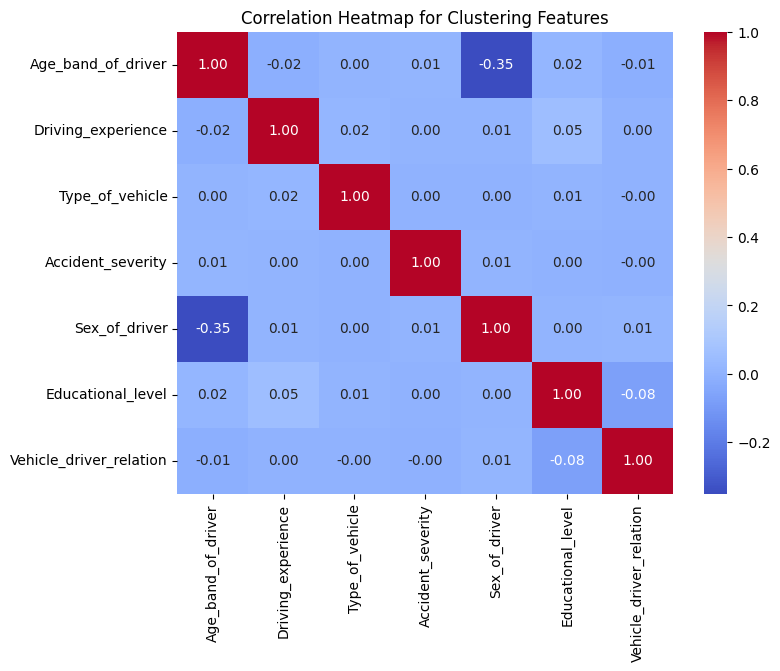

In [18]:
# Correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df_clustering.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Clustering Features")
plt.show()


In [19]:
from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X_high_variance = selector.fit_transform(X_scaled)
selected_features = df_clustering.columns[selector.get_support()]
print("Features retained after variance thresholding:\n", selected_features)


Features retained after variance thresholding:
 Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Accident_severity', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation'],
      dtype='object')


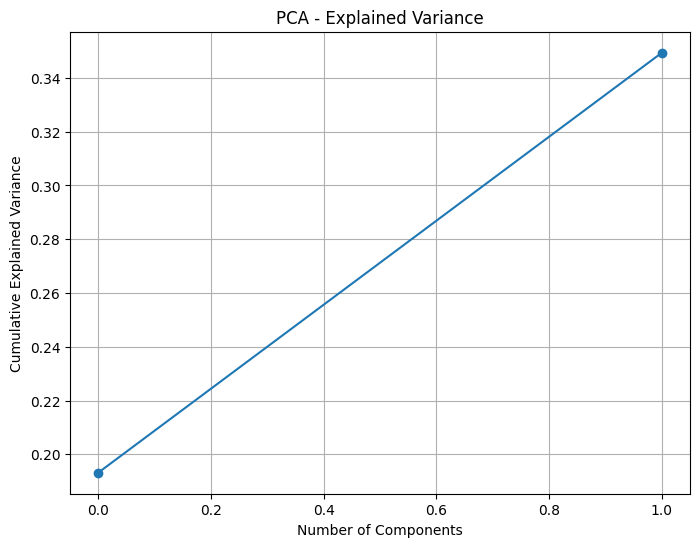

In [20]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)
# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [24]:
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest

# Statistical Test: Select features based on ANOVA F-statistic
k_best = SelectKBest(score_func=f_classif, k='all') 
k_best_scores = k_best.fit(X_high_variance, df_clustering['Accident_severity'])

# Store feature scores
feature_scores = pd.DataFrame({
    'Feature': selected_features,
    'Score': k_best_scores.scores_
}).sort_values(by='Score', ascending=False)
print("\nFeature Scores (ANOVA F-test):\n", feature_scores)

# Select top features based on scores
top_features = feature_scores['Feature'].head(5).tolist()  # Adjust the number of features if necessary
print("\nTop Selected Features for Clustering:\n", top_features)

# Prepare final data with selected features
X_refined = df_clustering[top_features]
X_scaled_refined = scaler.fit_transform(X_refined)

print("\nRefined Features Ready for Clustering:\n", X_refined.head())


Feature Scores (ANOVA F-test):
                    Feature         Score
3        Accident_severity  6.173554e+16
1       Driving_experience  2.470337e+00
0       Age_band_of_driver  2.243598e+00
4            Sex_of_driver  1.245134e+00
6  Vehicle_driver_relation  4.775487e-01
2          Type_of_vehicle  1.376448e-02
5        Educational_level  2.668933e-03

Top Selected Features for Clustering:
 ['Accident_severity', 'Driving_experience', 'Age_band_of_driver', 'Sex_of_driver', 'Vehicle_driver_relation']

Refined Features Ready for Clustering:
    Accident_severity  Driving_experience  Age_band_of_driver  Sex_of_driver  \
0                  2                   0                   0              1   
1                  2                   3                   1              1   
2                  1                   0                   0              1   
3                  2                   2                   0              1   
6                  2                   1             

With the refined features selected based on ANOVA F-test, the data is now ready for clustering. The features selected for clustering are:

[Accident_severity,
Driving_experience,
Age_band_of_driver,
Sex_of_driver,
Vehicle_driver_relation]

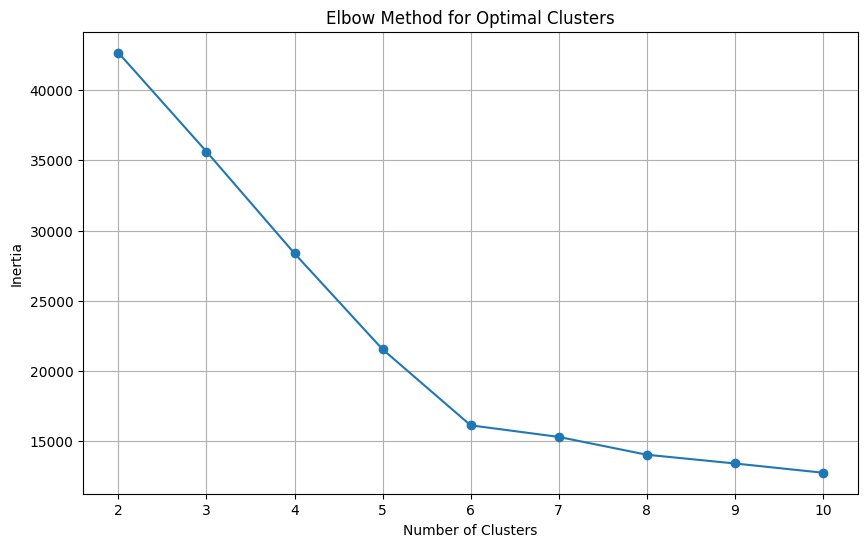

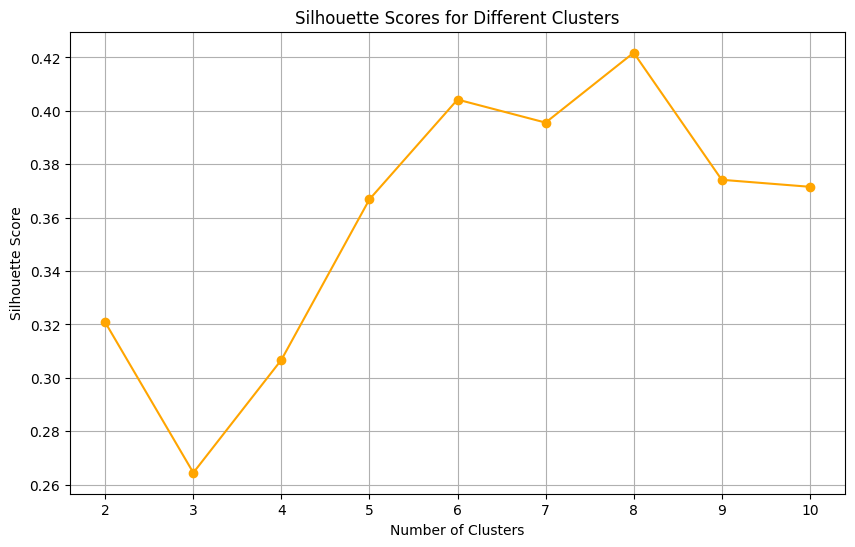

Optimal Number of Clusters Based on Silhouette Score: 8

Cluster Labels Assigned to Each Data Point:
   Age_band_of_driver  Driving_experience  Type_of_vehicle  Accident_severity  \
0                   0                   0                0                  2   
1                   1                   3               11                  2   
2                   0                   0                5                  1   
3                   0                   2               11                  2   
6                   0                   1                0                  2   

   Sex_of_driver  Educational_level  Vehicle_driver_relation  Cluster  
0              1                  0                        0        0  
1              1                  4                        0        1  
2              1                  4                        0        5  
3              1                  4                        0        0  
6              1                  4                 

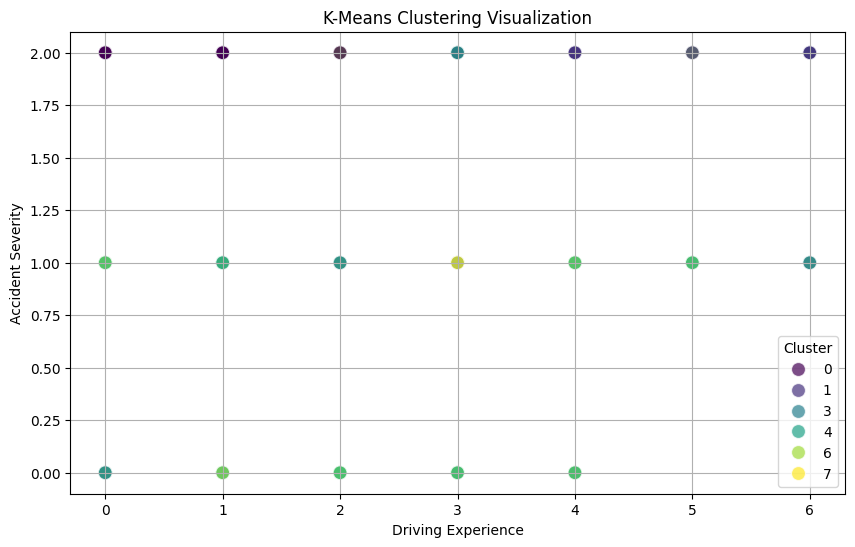

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Clustering
# Perform K-Means clustering on the refined features
def perform_kmeans_clustering(X, max_clusters=10):
    inertia = []
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    return cluster_range, inertia, silhouette_scores

# Run K-Means with different numbers of clusters
cluster_range, inertia, silhouette_scores = perform_kmeans_clustering(X_scaled_refined)

# Plot Elbow Method for Optimal Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Different Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Optimal Number of Clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters Based on Silhouette Score: {optimal_clusters}")

# Perform K-Means with Optimal Number of Clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_scaled_refined)

# Add Cluster Labels to the Data
df_clustering['Cluster'] = kmeans_optimal.labels_
print("\nCluster Labels Assigned to Each Data Point:")
print(df_clustering.head())

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_clustering['Driving_experience'], 
    y=df_clustering['Accident_severity'], 
    hue=df_clustering['Cluster'], 
    palette='viridis', 
    s=100, 
    alpha=0.7
)
plt.title("K-Means Clustering Visualization")
plt.xlabel("Driving Experience")
plt.ylabel("Accident Severity")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Cluster Profiles (Mean Feature Values):
          Age_band_of_driver  Driving_experience  Type_of_vehicle  \
Cluster                                                            
0                  0.737279            1.161734         5.504673   
1                  0.764563            3.467476         5.551456   
2                  1.139137            1.906994         5.404018   
3                  2.713235            1.928922         5.335784   
4                  3.426146            1.945671         5.638370   
5                  0.480140            1.953271         5.426402   
6                  3.604427            1.777671         5.569779   
7                  1.135659            1.872093         5.844961   

         Accident_severity  Sex_of_driver  Educational_level  \
Cluster                                                        
0                 2.000000       1.015057           3.131880   
1                 1.999515       1.014563           3.317476   
2                 2.00

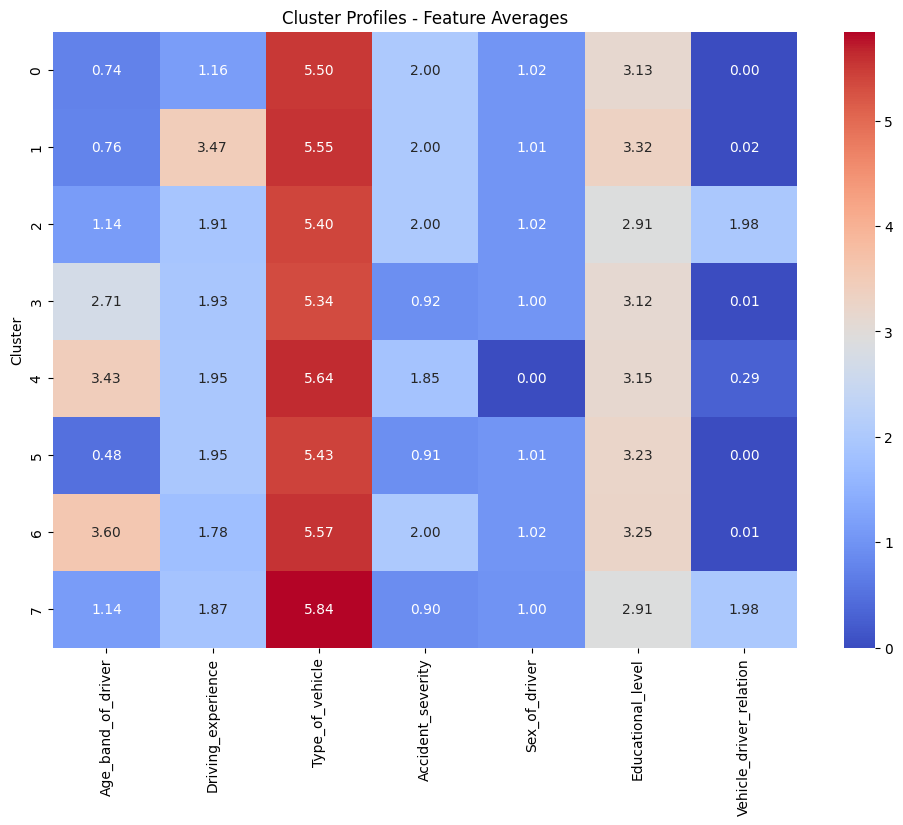

In [27]:
# Add the cluster labels to the original data
df_clustering['Cluster'] = df_clustering['Cluster']

# Group by cluster and calculate the mean for each feature
cluster_profiles = df_clustering.groupby('Cluster').mean()

# Display cluster profiles
print("Cluster Profiles (Mean Feature Values):\n", cluster_profiles)

# Visualize cluster profiles using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profiles, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cluster Profiles - Feature Averages")
plt.show()
